# Generative Adversarial Networks for X-RAY Classification

The [MedMNIST v2 dataset](https://medmnist.com/) is the MNIST of Medical Imaging containing a large-scale MNIST-like collection of standardized biomedical images.

Can we use this dataset to generate additional synthetic images? Can we condition the data generation on a label?

Let's try this in this exercise!

Jaime Leonardo Sánchez Salazar

## Exercise:


#### 1. Definition of Research Question
We propose to explore one of the MedMNIST datasets and and define a suitable research question. This research question should contain GANs in its hypothesis and aiming towards solving a useful clinical task. Note: Normally, one would also look up the literature to see if the research question is already answered. For now, we skip this step

#### 2. Definition of a Baseline for the Research Question
To test our hypothesis, we need to gather experimental data to compare our solution against the state-of-the-art. The state-of-the-art is our baseline method.

#### 3. Implementation of the Baseline
We implement the baseline and try to do so making our code reusable for our method  (e.g. dataloaders, downstream classifer).  

#### 4. Testing the Baseline and Storage of Results
Now, we test out our baseline implementation and gather the corresponding empirical results and observe its results on our target performance metrics. Can these results be improved upon? Or, can similar results be aachieved with our more e.g. privacy-preserving, interpretable, generalizable, simpler, or more environment friendly solution?

#### 5. Implementation of our GAN Method
The method we hypothesise for the clinical task at hand would need to be implemented to allow testing its usefulness.

#### 6. Test of our GAN Method and Storage of Results
Now is the time to observe whether our method/intervention yields useful results, as we can readily compare it to our  baseline.

#### 7. Comparison of our Method and Baseline, Interpretration of Results
Now that we have generated some experimental data, we can interpret our results and clearly demonstrate whether our method was useful for the clinical task. We can now reject or accept our hypothesis.

#### 8. Reflective Account
What could be the reasons why our study did or did not succeed? What do you think are the limitations of our study? What can we learn and takeaway from this exercise? How should it inform our future work? What are the next things to try?


# 1. Definition of a Research question


### Review of MedMNIST Datasets

The MedMNIST dataset including 12 datasets for 2D and 6 datasets for 3D, in total containing 708,069 2D images and 10,214 3D images. The dataset is pre-processed into 28 x 28 (2D) or 28 x 28 x 28 (3D) images alongside the corresponding classification labels for diverse classification tasks (binary/multi-class, ordinal regression and multi-label). More information can be found in the [MedMNIST homepage](https://medmnist.com/).


### Choice of PneumoniaMNIST Dataset for our Study

We propose to use the PneumoniaMNIST dataset from MedMNIST, which contains to 5,856 chest x-rays (train: 4,708, validation: 524, test: 624). The reason for choosing this dataset is that its respective image classification task is binary (pneumonia/normal). Binary classification is likely to be simpler than multi-class classification for data augmentation purposes i.e. only two rather than multiple class-conditioned images need to be generated.
More information on the source of the Pneumonia dataset can be found [here](https://www.sciencedirect.com/science/article/pii/S0092867418301545).


### Definition of our Research Question

We follow the clinical task defined by the dataset providers, which is the classification of resampled chest xrays to diagnose lung pneumonia.

In this regard, our objective would be to maximize the performance of the classifier on the test dataset that should, in theory, resemble the real world distribution if we'd deploy our classifer into a clinical setting.

Now, we could train a GAN to augment the classfier's training data, which might improve classification performance.

However, the [reported performance](https://medmnist.com/) is already quite strong:

**ResNet-18: AUC: 0.944, ACC: 0.854**

There seems to be not that much to gain with GAN-based data augmentation (*Note: You may still try if you like*).

On the other hand, privacy preservation is a topic of immense importance in medical imaging. The pneumonia chest scans are from a pediatric patient cohort that paticularly requires special data protection. We could train a GAN to generate a synthetic dataset that would likely need less privacy protection than the real data.

*Note: Feel free to checkout the related topic of [differential privacy](https://ai.googleblog.com/2022/02/applying-differential-privacy-to-large.html) that provides a guarantee of privacy, among others, in neural networks.*

In this sense, we can now define our hypothesis:

**H1: Could we, instead of using real patient data, use only synthetic data to train our classifier and achieve comparable performance?**

# 2. Definition of a Baseline for the Research Question


##### We can now define our baseline metrics:
For example, a ResNet-18 trained on the real training dataset achieved AUC: 0.944 and ACC: 0.854

##### We define our method:
A simple CNN trained on a GAN-generated synthetic training dataset.

You are free to change the CNN model and use another architecture (e.g.,[see baseline](https://medmnist.com/))

##### How do we create the GAN-generated dataset?
Feel free to explore any idea you have. You may try out different (un)conditional GAN architectures and loss functions. Further below you will find some optional guidance.

# 3. Implementation of the Baseline

### Getting the Data
As always, you need access to the dataset. In this case you can download the pneumoniamnist.npz from [Zenodo](https://zenodo.org/record/5208230#.YmcLxtNBz0o). However, note that you can also access medMNIST data via the python packaging index ([pip](https://pypi.org/project/medmnist/)) or [Github](https://github.com/MedMNIST/MedMNIST) directly as pytorch dataset class.

For example:

In [2]:
!pip3 install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached 

In [3]:
import medmnist
from medmnist import INFO, Evaluator
info = INFO['pneumoniamnist']
DataClass = getattr(medmnist, info['python_class'])

task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

Let's further explore the dataset. We can start by printing dataset info and checking the label distribution.

In [4]:
# Download the dataset
train_dataset = DataClass(split='train', download=True)

# Print dataset information
print(train_dataset)

100%|██████████| 4170669/4170669 [00:00<00:00, 4710686.35it/s]

Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: /root/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0


In [5]:
from collections import Counter

# Check the training label distribution
train_classes = [float(label) for _, label in train_dataset]
print (dict(Counter(train_classes)))

{1.0: 3494, 0.0: 1214}


<ipython-input-5-515e94852988>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_classes = [float(label) for _, label in train_dataset]


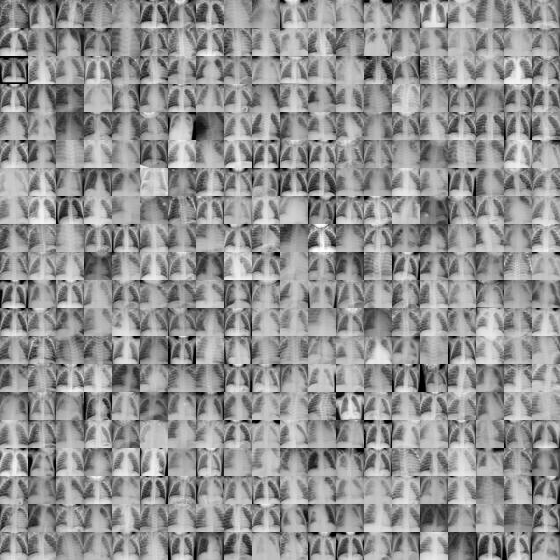

In [ ]:
# Let's have a look at some of the training images.
train_dataset.montage(length=20)

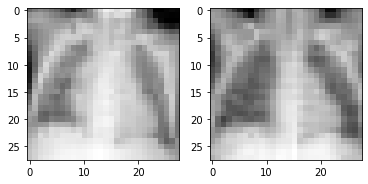

In [ ]:
# Let's visually compare pneumial vs. healthy thoraic xray
# 0: normal, 1: pneumonia
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].imshow(train_dataset[0][0], cmap='gray') # pneumonia
ax[1].imshow(train_dataset[200][0],cmap='gray') # normal

### Baseline Model Implementation
To implement the baseline, we start with the [medMNIST github](https://github.com/MedMNIST/MedMNIST), where we can find a [Pytorch getting started notebook](https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb).

In [ ]:
# We define a simple CNN model for pneumonia classification
from torch import nn

class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes-1)) # -1 if we use binary CLF

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

Initialization of model, criterion and optimizer

In [ ]:
from torch import optim

lr = 0.001

model_base = Net(in_channels=n_channels, num_classes=n_classes)

# define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model_base.parameters(), lr=lr, momentum=0.9)


# 4. Testing the Baseline and Storage of Results


Defining hyperparameters and splitting of the dataset into test, validation, train.

In [6]:
data_flag = 'pneumoniamnist'
download = True  #  set to False if already loaded

NUM_EPOCHS = 5
BATCH_SIZE = 128
#lr = 0.001

info = INFO[data_flag]
#task = info['task']
#n_channels = info['n_channels']
#n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [7]:
from torchvision import transforms, utils
from torch.utils.data import DataLoader, Dataset

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

# ingest torch datasets data into torch dataloader
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


Defining evaluation metrics such as the area under the receiver operating characteristic curve (AUROC) and the accuracy (ACC).

In [ ]:
def getAUC(y_true, y_score, task):
    '''AUC metric.
    :param y_true: the ground truth labels, shape: (n_samples, n_labels) or (n_samples,) if n_labels==1
    :param y_score: the predicted score of each class,
    shape: (n_samples, n_labels) or (n_samples, n_classes) or (n_samples,) if n_labels==1 or n_classes==1
    :param task: the task of current dataset
    '''
    y_true = y_true.squeeze()
    y_score = y_score.squeeze()

    if task == 'multi-label, binary-class':
        auc = 0
        for i in range(y_score.shape[1]):
            label_auc = roc_auc_score(y_true[:, i], y_score[:, i])
            auc += label_auc
        ret = auc / y_score.shape[1]
    elif task == 'binary-class':
        if y_score.ndim == 2:
            y_score = y_score[:, -1]
        else:
            assert y_score.ndim == 1
        ret = roc_auc_score(y_true, y_score)
    else:
        auc = 0
        for i in range(y_score.shape[1]):
            y_true_binary = (y_true == i).astype(float)
            y_score_binary = y_score[:, i]
            auc += roc_auc_score(y_true_binary, y_score_binary)
        ret = auc / y_score.shape[1]

    return ret

def getACC(y_true, y_score, task, threshold=0.5):
    '''Accuracy metric.
    :param y_true: the ground truth labels, shape: (n_samples, n_labels) or (n_samples,) if n_labels==1
    :param y_score: the predicted score of each class,
    shape: (n_samples, n_labels) or (n_samples, n_classes) or (n_samples,) if n_labels==1 or n_classes==1
    :param task: the task of current dataset
    :param threshold: the threshold for multilabel and binary-class tasks
    '''
    y_true = y_true.squeeze()
    y_score = y_score.squeeze()

    if task == 'multi-label, binary-class':
        y_pre = y_score > threshold
        acc = 0
        for label in range(y_true.shape[1]):
            label_acc = accuracy_score(y_true[:, label], y_pre[:, label])
            acc += label_acc
        ret = acc / y_true.shape[1]
    elif task == 'binary-class':
        if y_score.ndim == 2:
            y_score = y_score[:, -1]
        else:
            assert y_score.ndim == 1
        ret = accuracy_score(y_true, y_score > threshold)
    else:
        ret = accuracy_score(y_true, np.argmax(y_score, axis=-1))

    return ret

Training the baseline pneumonia classification model.

In [ ]:
from tqdm import tqdm

for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    model_base.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model_base(inputs)

        targets = targets.float()
        outputs = outputs.float()

        print(targets.shape)
        print(outputs.shape)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

  0%|                                                                                           | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|████▍                                                                              | 2/37 [00:00<00:07,  4.65it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 11%|████████▉                                                                          | 4/37 [00:00<00:06,  4.78it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 16%|█████████████▍                                                                     | 6/37 [00:01<00:05,  5.18it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 22%|█████████████████▉                                                                 | 8/37 [00:01<00:05,  5.34it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 27%|██████████████████████▏                                                           | 10/37 [00:01<00:05,  5.36it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 32%|██████████████████████████▌                                                       | 12/37 [00:02<00:04,  5.17it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 38%|███████████████████████████████                                                   | 14/37 [00:02<00:04,  5.01it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 43%|███████████████████████████████████▍                                              | 16/37 [00:03<00:04,  4.81it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 46%|█████████████████████████████████████▋                                            | 17/37 [00:03<00:04,  4.82it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|██████████████████████████████████████████                                        | 19/37 [00:03<00:03,  4.69it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|████████████████████████████████████████████▎                                     | 20/37 [00:04<00:03,  4.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 59%|████████████████████████████████████████████████▊                                 | 22/37 [00:04<00:02,  5.03it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 65%|█████████████████████████████████████████████████████▏                            | 24/37 [00:04<00:02,  4.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|███████████████████████████████████████████████████████▍                          | 25/37 [00:05<00:02,  4.86it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████████████████████████████████████████████████████████▊                      | 27/37 [00:05<00:01,  5.06it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 78%|████████████████████████████████████████████████████████████████▎                 | 29/37 [00:05<00:01,  5.15it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████████████████████████████████████████████████████████████████▋             | 31/37 [00:06<00:01,  5.28it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|█████████████████████████████████████████████████████████████████████████▏        | 33/37 [00:06<00:00,  5.22it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 35/37 [00:06<00:00,  5.37it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:07<00:00,  5.11it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  0%|                                                                                           | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  3%|██▏                                                                                | 1/37 [00:00<00:05,  6.25it/s]

torch.Size([128, 1])

  5%|████▍                                                                              | 2/37 [00:00<00:06,  5.45it/s]


torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 11%|████████▉                                                                          | 4/37 [00:00<00:06,  5.23it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|███████████▏                                                                       | 5/37 [00:00<00:06,  4.78it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█████████████▍                                                                     | 6/37 [00:01<00:06,  4.74it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 22%|█████████████████▉                                                                 | 8/37 [00:01<00:05,  5.17it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 27%|██████████████████████▏                                                           | 10/37 [00:01<00:05,  5.21it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 32%|██████████████████████████▌                                                       | 12/37 [00:02<00:04,  5.32it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 38%|███████████████████████████████                                                   | 14/37 [00:02<00:04,  5.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 43%|███████████████████████████████████▍                                              | 16/37 [00:02<00:03,  5.96it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 49%|███████████████████████████████████████▉                                          | 18/37 [00:03<00:03,  5.75it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|██████████████████████████████████████████                                        | 19/37 [00:03<00:03,  5.33it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|██████████████████████████████████████████████▌                                   | 21/37 [00:03<00:02,  5.49it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████████████████████████████████████████████████▉                               | 23/37 [00:04<00:02,  5.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 68%|███████████████████████████████████████████████████████▍                          | 25/37 [00:04<00:02,  5.78it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████████████████████████████████████████████████████████▊                      | 27/37 [00:04<00:01,  5.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 76%|██████████████████████████████████████████████████████████████                    | 28/37 [00:05<00:01,  5.61it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])

 78%|████████████████████████████████████████████████████████████████▎                 | 29/37 [00:05<00:01,  5.54it/s]


torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████████████████████████████████████████████████████████████████▋             | 31/37 [00:05<00:01,  5.85it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|█████████████████████████████████████████████████████████████████████████▏        | 33/37 [00:05<00:00,  5.72it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 35/37 [00:06<00:00,  5.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:06<00:00,  5.55it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  0%|                                                                                           | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  3%|██▏                                                                                | 1/37 [00:00<00:06,  5.99it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|████▍                                                                              | 2/37 [00:00<00:06,  5.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|████████▉                                                                          | 4/37 [00:00<00:05,  5.52it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 16%|█████████████▍                                                                     | 6/37 [00:01<00:05,  5.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 22%|█████████████████▉                                                                 | 8/37 [00:01<00:05,  5.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 27%|██████████████████████▏                                                           | 10/37 [00:01<00:04,  5.51it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 32%|██████████████████████████▌                                                       | 12/37 [00:02<00:04,  5.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 38%|███████████████████████████████                                                   | 14/37 [00:02<00:04,  5.54it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 43%|███████████████████████████████████▍                                              | 16/37 [00:02<00:03,  5.80it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 49%|███████████████████████████████████████▉                                          | 18/37 [00:03<00:03,  5.87it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 54%|████████████████████████████████████████████▎                                     | 20/37 [00:03<00:02,  6.07it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 59%|████████████████████████████████████████████████▊                                 | 22/37 [00:03<00:02,  5.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 65%|█████████████████████████████████████████████████████▏                            | 24/37 [00:04<00:02,  5.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 70%|█████████████████████████████████████████████████████████▌                        | 26/37 [00:04<00:01,  5.82it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 76%|██████████████████████████████████████████████████████████████                    | 28/37 [00:04<00:01,  5.25it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|██████████████████████████████████████████████████████████████████▍               | 30/37 [00:05<00:01,  4.98it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████████████████████████████████████████████████████████████████▋             | 31/37 [00:05<00:01,  4.91it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 86%|██████████████████████████████████████████████████████████████████████▉           | 32/37 [00:05<00:01,  4.89it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|█████████████████████████████████████████████████████████████████████████▏        | 33/37 [00:06<00:00,  4.84it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 35/37 [00:06<00:00,  5.27it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:06<00:00,  5.51it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  0%|                                                                                           | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|████▍                                                                              | 2/37 [00:00<00:07,  4.72it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|██████▋                                                                            | 3/37 [00:00<00:06,  4.99it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 14%|███████████▏                                                                       | 5/37 [00:01<00:06,  5.02it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 19%|███████████████▋                                                                   | 7/37 [00:01<00:05,  5.17it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|████████████████████▏                                                              | 9/37 [00:01<00:05,  5.09it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██████████████████████▏                                                           | 10/37 [00:02<00:05,  4.95it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 32%|██████████████████████████▌                                                       | 12/37 [00:02<00:04,  5.16it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|████████████████████████████▊                                                     | 13/37 [00:02<00:04,  5.12it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|█████████████████████████████████▏                                                | 15/37 [00:02<00:04,  5.10it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|█████████████████████████████████████▋                                            | 17/37 [00:03<00:03,  5.46it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|██████████████████████████████████████████                                        | 19/37 [00:03<00:03,  5.54it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|██████████████████████████████████████████████▌                                   | 21/37 [00:04<00:02,  5.39it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████████████████████████████████████████████████▉                               | 23/37 [00:04<00:02,  5.51it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 68%|███████████████████████████████████████████████████████▍                          | 25/37 [00:04<00:02,  5.52it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████████████████████████████████████████████████████████▊                      | 27/37 [00:05<00:01,  5.55it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 76%|██████████████████████████████████████████████████████████████                    | 28/37 [00:05<00:01,  5.16it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|██████████████████████████████████████████████████████████████████▍               | 30/37 [00:05<00:01,  5.17it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 86%|██████████████████████████████████████████████████████████████████████▉           | 32/37 [00:06<00:00,  5.32it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 92%|███████████████████████████████████████████████████████████████████████████▎      | 34/37 [00:06<00:00,  5.28it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 35/37 [00:06<00:00,  5.36it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:07<00:00,  5.28it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  0%|                                                                                           | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  3%|██▏                                                                                | 1/37 [00:00<00:06,  5.65it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|████▍                                                                              | 2/37 [00:00<00:06,  5.52it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|██████▋                                                                            | 3/37 [00:00<00:05,  5.75it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|████████▉                                                                          | 4/37 [00:00<00:06,  5.47it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█████████████▍                                                                     | 6/37 [00:01<00:05,  5.37it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 22%|█████████████████▉                                                                 | 8/37 [00:01<00:05,  5.33it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|████████████████████▏                                                              | 9/37 [00:01<00:04,  5.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|████████████████████████▍                                                         | 11/37 [00:01<00:04,  5.58it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 35%|████████████████████████████▊                                                     | 13/37 [00:02<00:04,  5.57it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|█████████████████████████████████▏                                                | 15/37 [00:02<00:04,  5.42it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 43%|███████████████████████████████████▍                                              | 16/37 [00:02<00:03,  5.53it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 49%|███████████████████████████████████████▉                                          | 18/37 [00:03<00:03,  5.82it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 54%|████████████████████████████████████████████▎                                     | 20/37 [00:03<00:02,  5.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 59%|████████████████████████████████████████████████▊                                 | 22/37 [00:03<00:02,  5.46it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 65%|█████████████████████████████████████████████████████▏                            | 24/37 [00:04<00:02,  5.22it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 70%|█████████████████████████████████████████████████████████▌                        | 26/37 [00:04<00:01,  5.73it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 76%|██████████████████████████████████████████████████████████████                    | 28/37 [00:05<00:01,  5.57it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|██████████████████████████████████████████████████████████████████▍               | 30/37 [00:05<00:01,  5.17it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████████████████████████████████████████████████████████████████▋             | 31/37 [00:05<00:01,  5.37it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|█████████████████████████████████████████████████████████████████████████▏        | 33/37 [00:06<00:00,  5.44it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 35/37 [00:06<00:00,  5.34it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:06<00:00,  5.50it/s]

torch.Size([100, 1])
torch.Size([100, 1])


Validation and test of the baseline model. This will let us know how good our model when trained on real data.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

#evaluation
def test(data_loader, model):

    model.eval()
    y_true = []
    y_score = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            outputs = torch.sigmoid(outputs)

            y_true.extend(targets.tolist())
            y_score.extend(outputs.tolist())

    y_true = torch.tensor(y_true)
    y_score = torch.tensor(y_score)

    # Calculate metrics
    acc = accuracy_score(y_true, y_score > 0.5)
    auc = roc_auc_score(y_true, y_score)
    cm = confusion_matrix(y_true, y_score > 0.5)
    fpr, tpr, _ = roc_curve(y_true, y_score)

    print('auc: %.3f  acc:%.3f' % (auc, acc))

    #We add two more outputs in order to better compare the results in exercise 7

    return acc, auc, y_true, cm, fpr, tpr


print('==> Evaluating baseline model ...')
print ('Train')
acc_train_baseline, auc_train_baseline, y_true, cm_train_baseline, fpr_train_baseline, tpr_train_baseline = test(train_loader_at_eval, model_base)
print ('Val')
acc_val_baseline, auc_val_baseline, y_true, cm_val_baseline, fpr_val_baseline, tpr_val_baseline = test(val_loader, model_base)
print ('Test')
acc_test_baseline, auc_test_baseline, y_true, cm_test_baseline, fpr_test_baseline, tpr_test_baseline = test(test_loader, model_base)

==> Evaluating baseline model ...
Train
auc: 0.991  acc:0.947
Val
auc: 0.985  acc:0.954
Test
auc: 0.942  acc:0.825


# 5 Definition and Implementation of our GAN Method

#### GAN Architecture Choice

You may use any GAN architecture and loss function you deem suitable.

To give some guidance, you could try a Deep Convolutional GAN ([DCGAN](https://arxiv.org/abs/1511.06434)). A helpful DCGAN implementation tutorial can be found [here](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html).

*Note that you will need to adjust the layers of the network to match the dimensions of the input data.*

DCGAN is an unconditional GAN architecture, which means that the data generation process is not controlled by the label information (pneumonia/normal). Hence, you would need to [extend the DCGAN architecture to a (DC)CGAN](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/) to be able to feed the labels as input into the generator and discriminator.

An alternative to the class-conditional GAN is to train an unconditional GAN twice - once on data with positive label and once on data with negative label.

*Note, instead of CGAN, you could also extend your DCGAN to the [Auxiliary Classifier GAN (ACGAN)] (https://arxiv.org/abs/1610.09585) architecture*.

Also, feel free to optionally use another deep generative model for this task instead of a GAN. For example, here you find a [tutorial](https://github.com/Project-MONAI/GenerativeModels/blob/main/tutorials/generative/classifier_free_guidance/2d_ddpm_classifier_free_guidance_tutorial.ipynb) for training a class-conditional diffusion model.

In [ ]:
# Your code goes here.

We will implement a DCGAN architecture.

In [ ]:
import torch.utils.data as data

data_loader = data.DataLoader(train_dataset, batch_size=len(train_dataset))
batch = next(iter(data_loader))
train_array, label_train = batch[0].numpy(), batch[1].numpy()
print(train_array.shape)
print(label_train.shape)

(4708, 1, 28, 28)
(4708, 1)


In [ ]:
# Change shape (1,28,28) to (28,28,1)
train_array = train_array.reshape((train_array.shape[0], train_array.shape[2], train_array.shape[3], train_array.shape[1]))
print(train_array.shape)

(4708, 28, 28, 1)


In [ ]:
# Necessary packages
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model,load_model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Embedding, Concatenate

Let us implement the discriminator architecture following the recommendations found on the page (https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/ )

## Discriminator

In [ ]:
# Define the standalone discriminator model
in_shape = (28,28,1)
n_classes = 2
# Label input
in_label = Input(shape=(1,))
# Embedding for categorical input
li = Embedding(n_classes, 50)(in_label)
# Scale up to image dimensions with linear activation
n_nodes = in_shape[0] * in_shape[1]
li = Dense(n_nodes)(li)
# Reshape to additional channel
li = Reshape((in_shape[0], in_shape[1], 1))(li)
# Image input
in_image = Input(shape=in_shape)
# Concat label as a channel
merge = Concatenate()([in_image, li])
# Downsample
fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
fe = LeakyReLU(alpha=0.2)(fe)
# Downsample
fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
fe = LeakyReLU(alpha=0.2)(fe)
# Flatten feature maps
fe = Flatten()(fe)
# Dropout
fe = Dropout(0.4)(fe)
# Output
out_layer = Dense(1, activation='sigmoid')(fe)
# Define model
discriminator = Model([in_image, in_label], out_layer)
discriminator.summary()
# Compile model
opt = Adam(learning_rate=0.0002, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        100         ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 1, 784)       39984       ['embedding[0][0]']              
                                                                                                  
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                              

## Generator

In [ ]:
# Define the standalone generator model
latent_dim = 100
n_classes = 2

# Label input
in_label = Input(shape=(1,))

# Embedding for categorical input
li = Embedding(n_classes, 50)(in_label)

# Linear multiplication
n_nodes = 7 * 7
li = Dense(n_nodes)(li)

# Reshape to additional channel
li = Reshape((7, 7, 1))(li)

# Image generator input
in_lat = Input(shape=(latent_dim,))

# Foundation for 7x7 image
n_nodes = 128 * 7 * 7
gen = Dense(n_nodes)(in_lat)
gen = LeakyReLU(alpha=0.2)(gen)
gen = Reshape((7, 7, 128))(gen)

# Merge image gen and label input
merge = Concatenate()([gen, li])

# Upsample to 14x14
gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
gen = LeakyReLU(alpha=0.2)(gen)

# Upsample to 28x28
gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
gen = LeakyReLU(alpha=0.2)(gen)

# Output
out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)

# Define model
generator = Model([in_lat, in_label], out_layer)
generator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 6272)         633472      ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 50)        100         ['input_3[0][0]']                
                                                                                            

## GAN

Let us combine both previous models in order to create the GAN. A GAN model can be constructed by integrating both the generator and discriminator models into a single larger model. This augmented model is employed to update the weights of the generator, leveraging the output and error determined by the discriminator. The discriminator is trained independently, with its weights marked as non-trainable within the larger GAN model to exclusively update the generator's parameters. This adjustment in the trainability of the discriminator's weights only impacts training when using the combined GAN model, not when training the discriminator on its own.

In [ ]:
# Define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):

    # Make weights in the discriminator not trainable
    d_model.trainable = False

    # Get noise and label inputs from generator model
    gen_noise, gen_label = g_model.input

    # Get image output from the generator model
    gen_output = g_model.output

    # Connect image output and label input from generator as inputs to discriminator
    gan_output = d_model([gen_output, gen_label])

    # Define gan model as taking noise and label and outputting a classification
    model = Model([gen_noise, gen_label], gan_output)

    # Compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In order to train our Gan, we will need one batch (or a half) batch of real images from the dataset each update to the GAN model. A simple way to achieve this is to select a random sample of images from the dataset each time.

The following function below implements this, selecting and returning a random sample of the dataset and their corresponding class label for the discriminator, specifically class=1, indicating that they are real images.

In [ ]:
# Select real samples
def generate_real_samples(dataset, n_samples):

    # Split into images and labels
    images, labels = dataset

    # Choose random instances
    ix = randint(0, images.shape[0], n_samples)

    # Select images and labels
    X, labels = images[ix], labels[ix]

    # Generate class labels
    y = ones((n_samples, 1))
    return [X, labels], y

Next, we also need inputs for the generator model. These are random points from the latent space, specifically Gaussian distributed random variables.



In [ ]:
# Generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=2):

    # Generate points in the latent space
    x_input = randn(latent_dim * n_samples)

    # Reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)

    # Generate labels
    labels = randint(0, n_classes, n_samples)
    return [z_input, labels]

Now we need to use the points in the latent space as input to the generator in order to generate new images.

The following function below takes the generator model and size of the latent space as arguments, then generating points in the latent space and using them as input to the generator model. The function returns the generated images and their corresponding class label for the discriminator model, specifically class=0 to indicate they are fake or generated.

In [ ]:
# Use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):

    # Generate points in latent space
    z_input, labels_input = generate_latent_points(latent_dim, n_samples)

    # Predict outputs
    images = generator.predict([z_input, labels_input])

    # Create class labels
    y = zeros((n_samples, 1))
    return [images, labels_input], y

Finally, let us fit the GAN Models.

First, the discriminator model is updated for a half batch of real samples, then a half batch of fake samples, together forming one batch of weight updates. The generator is then updated via the composite gan model. Importantly, the class label is set to 1 or real for the fake samples. This has the effect of updating the generator toward getting better at generating real samples on the next batch.

In [ ]:
# Train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):

    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # Manually enumerate epochs
    for i in range(n_epochs):
        # Enumerate batches over the training set
        for j in range(bat_per_epo):

            # Get randomly selected 'real' samples
            [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
            # Update discriminator model weights
            d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
            # Generate 'fake' examples
            [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # Update discriminator model weights
            d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
            # Prepare points in latent space as input for the generator
            [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
            # Create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # Update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
        # Summarize loss on this batch
        print('>%d, d1=%.3f, d2=%.3f g=%.3f' %
        (i+1,  d_loss1, d_loss2, g_loss))
    # Save the generator model
    g_model.save('cgan_generator.h5')

So, finally, let us train our GAN model.

In [ ]:
# Create the gan
gan_model = define_gan(generator, discriminator)
# Train model
train(generator, discriminator, gan_model, [train_array, label_train.reshape(4708)], latent_dim)

2/2 [==============================] - 0s 5ms/step
>1, d1=0.518, d2=1.029 g=0.498
2/2 [==============================] - 0s 5ms/step
>2, d1=0.720, d2=0.710 g=0.688
2/2 [==============================] - 0s 5ms/step
>3, d1=0.681, d2=0.673 g=0.747
2/2 [==============================] - 0s 6ms/step
>4, d1=0.708, d2=0.572 g=0.882
2/2 [==============================] - 0s 5ms/step
>5, d1=0.685, d2=0.629 g=0.798
2/2 [==============================] - 0s 5ms/step
>6, d1=0.654, d2=0.688 g=0.823
2/2 [==============================] - 0s 6ms/step
>7, d1=0.676, d2=0.634 g=0.805
2/2 [==============================] - 0s 5ms/step
>8, d1=0.697, d2=0.692 g=0.746
2/2 [==============================] - 0s 6ms/step
>9, d1=0.710, d2=0.683 g=0.805
2/2 [==============================] - 0s 6ms/step
>10, d1=0.666, d2=0.665 g=0.802
2/2 [==============================] - 0s 4ms/step
>11, d1=0.669, d2=0.699 g=0.800
2/2 [==============================] - 0s 6ms/step
>12, d1=0.653, d2=0.663 g=0.778
2/2 [========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


>100, d1=0.672, d2=0.676 g=0.780


#### Synthetic Data Evaluation Metric

Given our hypothesis, we need to evaluate the GAN based on the downstream task i.e. the classification performance (AUC, ACC). However, we should also report a fidelity and diversity estimate of our synthetic data. This is not only useful as additional metric, but also as stopping criterion of GAN training (e.g., n epochs without improvement). We propose you use the [Fréchet Inception Distance](https://github.com/mseitzer/pytorch-fid), but feel free to suggest other or additional metrics. Feel free to use existing packages such as the [pytorch-fid](https://pypi.org/project/pytorch-fid/) package.

In [ ]:
# Your code/logs go here.

The Frechet Inception Distance (FID) is a metric designed for assessing the quality of generated images, particularly tailored for evaluating GAN performance. Unlike the Inception Score (IS), which gauges image quality and diversity based on class predictions, FID evaluates synthetic images against real ones by comparing their statistical distributions using activations from the Inception v3 model's coding layer. Lower FID scores indicate higher image quality, while higher scores suggest lower quality.

Thus, let us load the Inception v3 model from Keras, a pretrained model to calculate the activations or feature vectors for each image. This will prepare a version of the inception model for classifying images as one of 1,000 known classes. We will use this model to predict the feature vector for one or more images. Note that before doing that, we need to reshape our images.

In [ ]:
import numpy
from numpy import cov, trace, iscomplexobj,asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize

In [ ]:
# Load inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3)) # Default shape

In [ ]:
# Scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:

        # Resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)

        # Store
        images_list.append(new_image)
    return asarray(images_list)

In [ ]:
# Calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # Calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)

    # Calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)

    # Calculate sum squared difference between means
    ssdiff = numpy.sum((mu1 - mu2)**2.0)

    # Calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))

    # Check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real

    # Calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

With all the preivous functions, we are ready to compute the FID between the fake images generated by the GAN model and the original ones.

In [ ]:
GAN_model = load_model('cgan_generator.h5')

# Generate images
latent_points, labels = generate_latent_points(100, 4708, 2)

# Specify labels
false_label = np.asarray([0 for x in range(2354)])
true_label = np.asarray([1 for x in range(2354)])
labels = np.concatenate((false_label, true_label),axis=0)
X  = GAN_model.predict([latent_points, labels])

148/148 [==============================] - 12s 78ms/step


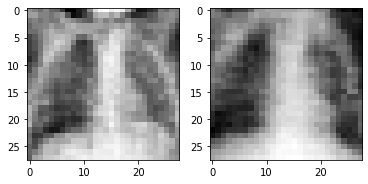

In [ ]:
# Let's visually compare pneumial vs. healthy thoraic xray generated by our GAN
# 0: normal, 1: pneumonia
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[3], cmap='gray') # pneumonia
ax[1].imshow(X[2846],cmap='gray') # normal

They actually look very similar!

In [ ]:
# Compute FID
# Resize images
images1 = scale_images(X, (299,299,3))
images2 = scale_images(train_array, (299,299,3))

# Fid between images1 and images2
fid = calculate_fid(model,images1,images2)
print('FID: %.3f' % fid)

148/148 [==============================] - 466s 3s/step
FID: 65.988


# 6. Test of our GAN Method and Storage of Results

Now that you have trained your GAN, it is time for the big moment of testing our hypothesis. To do so, a balanced classifier training dataset (50% pneumonia, 50% normal) consisting only of synthetic data is suggested. You may sample this dataset from your trained conditional generator, store on disc and load it again here.

In [ ]:
# read data from disc (maybe also check dimensions)
generated_imgs_w_label_0 = X[:2354].reshape(X[:2354].shape[0],X[:2354].shape[3],X[:2354].shape[1],X[:2354].shape[2])
generated_imgs_w_label_1 = X[2354:].reshape(X[2354:].shape[0],X[2354:].shape[3],X[2354:].shape[1],X[2354:].shape[2])

Below some helper code to help define a torch CustomImageDataset Class based on the generated images that are loaded from disc.

In [ ]:
from torch.utils.data import Dataset
import pandas as pd

class CustomImageDataset(Dataset):
    def __init__(self, imgs_label_0, imgs_label_1, transform=None, target_transform=None):
        self.img_labels = pd.DataFrame(
            np.concatenate((np.zeros(len(imgs_label_0), dtype=int),
                            np.ones(len(imgs_label_1), dtype=int)))
        )
        self.images = np.concatenate((imgs_label_0,imgs_label_1))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx])
        label = np.array([self.img_labels.iloc[idx, 0]])
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
from torch import optim
lr = 0.001
model_GAN = Net(in_channels=n_channels, num_classes=2)

# define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model_GAN.parameters(), lr=lr, momentum=0.9)

In [ ]:
# Create torch dataset with generated images
train_gen_dataset = CustomImageDataset(generated_imgs_w_label_0, generated_imgs_w_label_1)
# Create torch dataloader
train_gen_loader = data.DataLoader(dataset=train_gen_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = DataLoader(dataset=train_gen_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Training of the classifier, as was done above with real data, but now with the generated dataset.

In [ ]:
from tqdm import tqdm
import torch
for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    model_GAN.train()  #now with GAN
    for inputs, targets in tqdm(train_gen_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model_GAN(inputs)

        targets = targets.float()
        outputs = outputs.float()

        print(targets.shape)
        print(outputs.shape)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

  3%|██▏                                                                                | 1/37 [00:00<00:12,  2.79it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


  8%|██████▋                                                                            | 3/37 [00:00<00:07,  4.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 14%|███████████▏                                                                       | 5/37 [00:01<00:05,  5.36it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 19%|███████████████▋                                                                   | 7/37 [00:01<00:05,  5.74it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|████████████████████▏                                                              | 9/37 [00:01<00:04,  6.18it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 30%|████████████████████████▍                                                         | 11/37 [00:02<00:04,  5.58it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 35%|████████████████████████████▊                                                     | 13/37 [00:02<00:04,  5.38it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|█████████████████████████████████▏                                                | 15/37 [00:02<00:03,  5.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|█████████████████████████████████████▋                                            | 17/37 [00:03<00:03,  5.92it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|██████████████████████████████████████████                                        | 19/37 [00:03<00:03,  5.89it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|██████████████████████████████████████████████▌                                   | 21/37 [00:03<00:02,  5.50it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████████████████████████████████████████████████▉                               | 23/37 [00:04<00:02,  5.43it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 68%|███████████████████████████████████████████████████████▍                          | 25/37 [00:04<00:01,  6.01it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████████████████████████████████████████████████████████▊                      | 27/37 [00:04<00:01,  6.19it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 78%|████████████████████████████████████████████████████████████████▎                 | 29/37 [00:05<00:01,  5.96it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████████████████████████████████████████████████████████████████▋             | 31/37 [00:05<00:01,  5.59it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|█████████████████████████████████████████████████████████████████████████▏        | 33/37 [00:05<00:00,  5.39it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 35/37 [00:06<00:00,  5.36it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:06<00:00,  5.55it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  3%|██▏                                                                                | 1/37 [00:00<00:07,  5.07it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


  5%|████▍                                                                              | 2/37 [00:00<00:06,  5.44it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|████████▉                                                                          | 4/37 [00:00<00:06,  5.48it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 16%|█████████████▍                                                                     | 6/37 [00:01<00:06,  5.10it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|███████████████▋                                                                   | 7/37 [00:01<00:06,  4.92it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|████████████████████▏                                                              | 9/37 [00:01<00:05,  5.18it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 30%|████████████████████████▍                                                         | 11/37 [00:02<00:04,  5.45it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 35%|████████████████████████████▊                                                     | 13/37 [00:02<00:04,  5.39it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])

 38%|███████████████████████████████                                                   | 14/37 [00:02<00:04,  5.55it/s]


torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 43%|███████████████████████████████████▍                                              | 16/37 [00:02<00:03,  5.51it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 49%|███████████████████████████████████████▉                                          | 18/37 [00:03<00:03,  5.83it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 54%|████████████████████████████████████████████▎                                     | 20/37 [00:03<00:03,  5.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 59%|████████████████████████████████████████████████▊                                 | 22/37 [00:04<00:02,  5.49it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 65%|█████████████████████████████████████████████████████▏                            | 24/37 [00:04<00:02,  5.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 70%|█████████████████████████████████████████████████████████▌                        | 26/37 [00:04<00:01,  5.92it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 76%|██████████████████████████████████████████████████████████████                    | 28/37 [00:05<00:01,  5.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|██████████████████████████████████████████████████████████████████▍               | 30/37 [00:05<00:01,  5.79it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 86%|██████████████████████████████████████████████████████████████████████▉           | 32/37 [00:05<00:00,  5.65it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 92%|███████████████████████████████████████████████████████████████████████████▎      | 34/37 [00:06<00:00,  5.95it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 36/37 [00:06<00:00,  6.28it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([100, 1])
torch.Size([100, 1])


  3%|██▏                                                                                | 1/37 [00:00<00:04,  7.23it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


  8%|██████▋                                                                            | 3/37 [00:00<00:05,  5.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 14%|███████████▏                                                                       | 5/37 [00:00<00:05,  5.59it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 19%|███████████████▋                                                                   | 7/37 [00:01<00:05,  5.93it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|████████████████████▏                                                              | 9/37 [00:01<00:04,  6.14it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 30%|████████████████████████▍                                                         | 11/37 [00:01<00:04,  6.05it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 35%|████████████████████████████▊                                                     | 13/37 [00:02<00:03,  6.17it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|█████████████████████████████████▏                                                | 15/37 [00:02<00:03,  5.89it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|█████████████████████████████████████▋                                            | 17/37 [00:02<00:03,  6.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|██████████████████████████████████████████                                        | 19/37 [00:03<00:03,  5.79it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|██████████████████████████████████████████████▌                                   | 21/37 [00:03<00:02,  5.94it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████████████████████████████████████████████████▉                               | 23/37 [00:03<00:02,  6.22it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 68%|███████████████████████████████████████████████████████▍                          | 25/37 [00:04<00:01,  6.29it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████████████████████████████████████████████████████████▊                      | 27/37 [00:04<00:01,  6.09it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 78%|████████████████████████████████████████████████████████████████▎                 | 29/37 [00:04<00:01,  6.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████████████████████████████████████████████████████████████████▋             | 31/37 [00:05<00:00,  6.48it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|█████████████████████████████████████████████████████████████████████████▏        | 33/37 [00:05<00:00,  5.87it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 35/37 [00:05<00:00,  5.73it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:06<00:00,  6.02it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  0%|                                                                                           | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  3%|██▏                                                                                | 1/37 [00:00<00:06,  5.89it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|████▍                                                                              | 2/37 [00:00<00:05,  6.55it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|██████▋                                                                            | 3/37 [00:00<00:05,  6.09it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|████████▉                                                                          | 4/37 [00:00<00:05,  6.27it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|███████████▏                                                                       | 5/37 [00:00<00:04,  6.44it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█████████████▍                                                                     | 6/37 [00:00<00:04,  6.28it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|███████████████▋                                                                   | 7/37 [00:01<00:04,  6.27it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 22%|█████████████████▉                                                                 | 8/37 [00:01<00:05,  5.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|████████████████████▏                                                              | 9/37 [00:01<00:04,  5.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██████████████████████▏                                                           | 10/37 [00:01<00:04,  5.69it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|████████████████████████▍                                                         | 11/37 [00:01<00:04,  5.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|████████████████████████████▊                                                     | 13/37 [00:02<00:04,  5.15it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 38%|███████████████████████████████                                                   | 14/37 [00:02<00:04,  4.87it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 41%|█████████████████████████████████▏                                                | 15/37 [00:02<00:04,  5.03it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|█████████████████████████████████████▋                                            | 17/37 [00:03<00:04,  4.74it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|██████████████████████████████████████████                                        | 19/37 [00:03<00:03,  5.24it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|██████████████████████████████████████████████▌                                   | 21/37 [00:03<00:03,  5.19it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 59%|████████████████████████████████████████████████▊                                 | 22/37 [00:04<00:02,  5.25it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 65%|█████████████████████████████████████████████████████▏                            | 24/37 [00:04<00:02,  5.20it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|███████████████████████████████████████████████████████▍                          | 25/37 [00:04<00:02,  5.02it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|█████████████████████████████████████████████████████████▌                        | 26/37 [00:04<00:02,  5.00it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 76%|██████████████████████████████████████████████████████████████                    | 28/37 [00:05<00:01,  5.37it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|██████████████████████████████████████████████████████████████████▍               | 30/37 [00:05<00:01,  5.33it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])

 84%|████████████████████████████████████████████████████████████████████▋             | 31/37 [00:05<00:01,  5.42it/s]


torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|█████████████████████████████████████████████████████████████████████████▏        | 33/37 [00:06<00:00,  5.15it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 35/37 [00:06<00:00,  5.26it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:06<00:00,  5.37it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  0%|                                                                                           | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  3%|██▏                                                                                | 1/37 [00:00<00:07,  4.86it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|████▍                                                                              | 2/37 [00:00<00:06,  5.29it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|██████▋                                                                            | 3/37 [00:00<00:06,  5.42it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|████████▉                                                                          | 4/37 [00:00<00:06,  5.39it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█████████████▍                                                                     | 6/37 [00:01<00:05,  5.18it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|███████████████▋                                                                   | 7/37 [00:01<00:05,  5.12it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|████████████████████▏                                                              | 9/37 [00:01<00:05,  5.08it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██████████████████████▏                                                           | 10/37 [00:01<00:05,  5.05it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 32%|██████████████████████████▌                                                       | 12/37 [00:02<00:04,  5.00it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|████████████████████████████▊                                                     | 13/37 [00:02<00:04,  4.88it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|█████████████████████████████████▏                                                | 15/37 [00:02<00:04,  4.94it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|█████████████████████████████████████▋                                            | 17/37 [00:03<00:04,  4.82it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|███████████████████████████████████████▉                                          | 18/37 [00:03<00:04,  4.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|██████████████████████████████████████████                                        | 19/37 [00:03<00:03,  4.73it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|████████████████████████████████████████████▎                                     | 20/37 [00:04<00:03,  4.78it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])

 57%|██████████████████████████████████████████████▌                                   | 21/37 [00:04<00:03,  4.69it/s]

 59%|████████████████████████████████████████████████▊                                 | 22/37 [00:04<00:03,  4.72it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████████████████████████████████████████████████▉                               | 23/37 [00:04<00:02,  4.84it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 68%|███████████████████████████████████████████████████████▍                          | 25/37 [00:05<00:02,  4.82it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|█████████████████████████████████████████████████████████▌                        | 26/37 [00:05<00:02,  4.90it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 76%|██████████████████████████████████████████████████████████████                    | 28/37 [00:05<00:01,  4.97it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|██████████████████████████████████████████████████████████████████▍               | 30/37 [00:06<00:01,  4.97it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 86%|██████████████████████████████████████████████████████████████████████▉           | 32/37 [00:06<00:01,  4.91it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 92%|███████████████████████████████████████████████████████████████████████████▎      | 34/37 [00:06<00:00,  4.83it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 35/37 [00:07<00:00,  4.79it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:07<00:00,  4.96it/s]

torch.Size([100, 1])
torch.Size([100, 1])


Test of the classifier, as was done above with real data, but now with the generated dataset.

In [ ]:
print('==> Evaluating baseline model ...')
acc_train_GAN, auc_train_GAN, y_true_GAN, cm_train_GAN, fpr_train_GAN, tpr_train_GAN = test(train_loader_at_eval, model_GAN)
acc_val_GAN, auc_val_GAN, y_true_GAN, cm_val_GAN, fpr_val_GAN, tpr_val_GAN = test(val_loader, model_GAN)
acc_test_GAN, auc_test_GAN, y_true_GAN, cm_test_GAN, fpr_test_GAN, tpr_test_GAN = test(test_loader, model_GAN)

==> Evaluating baseline model ...
auc: 1.000  acc:1.000
auc: 0.918  acc:0.861
auc: 0.915  acc:0.792


# 7. Comparison of our Method and Baseline, Interpretration of Results

You may use some visualization techniques here to compare the baseline (i) with your method (ii). For example, it would be interesting to plot both ROC-AUC curves to visually compare them. Another visualization option is a confusion matrix for (i) and (ii).

In [ ]:
# example function for plotting multiple ROC-AUC curve in one figure.
def plot_roc_cur(fpr1, tpr1, fpr2, tpr2, auc1, auc2):
    plt.plot(fpr1, tpr1, color='orange', label='Classifier 1 (Baseline) (AUROC = %0.3f)' % auc1)
    plt.plot(fpr2, tpr2, color='gray', label='Classifier 2 (GAN) (AUROC = %0.3f)' % auc2)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
# Confusion matrices
def confusion_matrix(X,Y,char1,char2):

  # Create a figure with two subplots side by side
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

  #Left
  disp1 = ConfusionMatrixDisplay(confusion_matrix=X)
  disp1.plot(ax=ax[0], values_format='.0f', cmap='Blues')

  #Right
  disp2 = ConfusionMatrixDisplay(confusion_matrix=Y)
  disp2.plot(ax=ax[1], values_format='.0f', cmap='Blues')

  ax[0].set_title(char1)
  ax[1].set_title(char2)
  plt.subplots_adjust(wspace=0.6)
  plt.show()

We will compare the baseline with our method in all three steps: Train, Validation and Test:

# Train

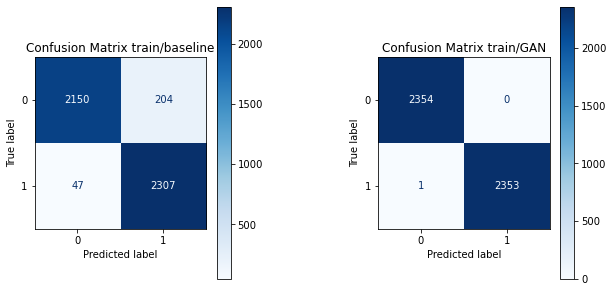

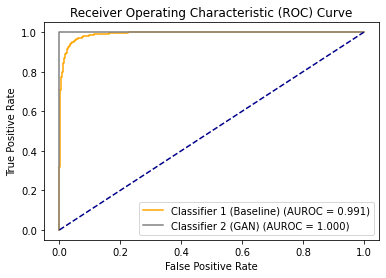

In [ ]:
confusion_matrix(cm_train_baseline,cm_train_GAN,'Confusion Matrix train/baseline','Confusion Matrix train/GAN')
plot_roc_cur(fpr_train_baseline, tpr_train_baseline,fpr_train_GAN, tpr_train_GAN, auc_train_baseline, auc_train_GAN)

# Validation

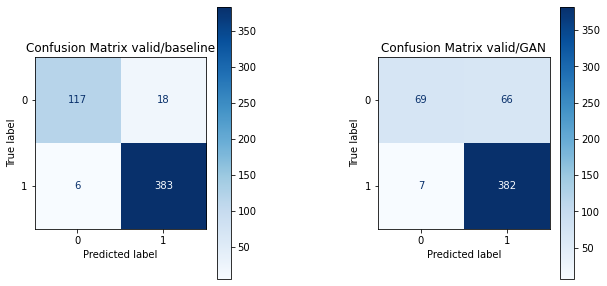

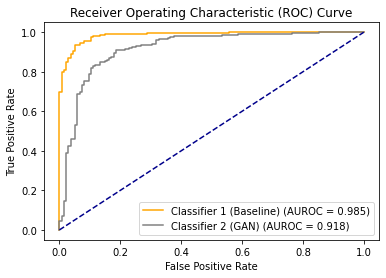

In [ ]:
confusion_matrix(cm_val_baseline,cm_val_GAN,'Confusion Matrix valid/baseline','Confusion Matrix valid/GAN')
plot_roc_cur(fpr_val_baseline, tpr_val_baseline,fpr_val_GAN, tpr_val_GAN, auc_val_baseline, auc_val_GAN)

# Test

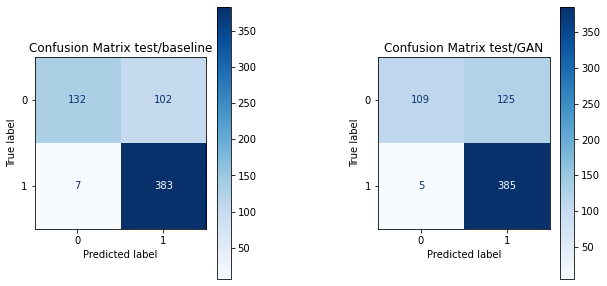

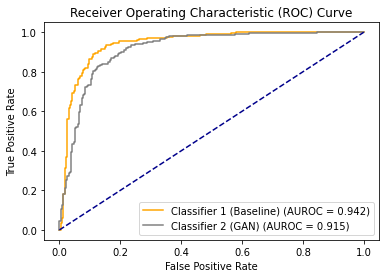

In [ ]:
confusion_matrix(cm_test_baseline,cm_test_GAN,'Confusion Matrix test/baseline','Confusion Matrix test/GAN')
plot_roc_cur(fpr_test_baseline, tpr_test_baseline, fpr_test_GAN, tpr_test_GAN, auc_test_baseline, auc_test_GAN)

How would you interpret the results you achieved? Would you say your GAN-based privatization method is useful in practice? Do you reject or accept the hypothesis defined above?

Let us first summarize our results in a table:

|              | Baseline model (auc/acc) | | GAN model (auc/acc) | |
|--------------|-------------------------|-|---------------------|-|
| Train        | 0.991 / 0.947           | | 1.000 / 1.000       | |
| Validation   | 0.985 / 0.954           | | 0.918 / 0.861       | |
| Test         | 0.942 / 0.825           | | 0.915 / 0.792       | |


Interpreting the results reveals that while our GAN-based privatization method surpasses the baseline on the training set, it exhibits slightly inferior performance on validation, though comparable results on the test set. The near-perfect accuracy achieved with the GAN model suggests potential overfitting during training, indicating that the baseline might generalize better overall.

An inherent advantage of the GAN model lies in its ability to train classifiers with balanced datasets, mitigating biases that may arise from unbalanced data. This is evidenced by the balanced training accuracy compared to the baseline. Moreover, the quality of GAN-generated images contributes to effectively balancing datasets, enhancing the utility of the GAN approach.

Considering our initial hypothesis, whether synthetic data could replace real patient data for training classifiers, the results affirmatively support this notion. Achieving comparable performance with synthetic data validates the hypothesis, underscoring the practical utility of the GAN-based method. (Although still we can (and need to) improve a lot our results).



In conclusion, the GAN-based privatization method demonstrates practical usefulness, offering comparable performance with synthetic images. This eliminates the need for extensive data collection, especially in contexts where privacy concerns restrict access to real patient data. Thus, the hypothesis stands affirmed, as synthetic data proves to be a viable alternative for training classifiers.

# 8. Reflective Account

What could be the reasons why our study did or did not succeed? What do you think are the limitations of our study? What can we learn and takeaway from this exercise? How should it inform our future work? What would you try next?

In [ ]:
# Your answer goes here.


The success of our study can be attributed to several factors. Firstly, training our model with a balanced dataset instead of the original unbalanced one greatly enhanced its ability to identify the minority class swiftly, a crucial advantage reflected in our training set analysis. Additionally, the simplicity of our classification problem, where distinguishing between normal and pneumonia-afflicted images is relatively straightforward, allowed our GAN model to effectively imitate the dataset using just 4708 images. This ease of problem duplication circumvented the usual challenge of training GANs with large datasets. However, it's worth noting that while the generated images sufficed for classification purposes, their lack of super realism could pose challenges if more detailed information were required.

Despite these successes, our study has limitations. We're constrained by the nature of our problem; if we were to tackle more intricate diseases or require finer image details, the quality of our synthetic images might prove insufficient. This underscores the need for further improvement in GAN architecture and hyperparameter tuning, especially in capturing finer details and enhancing image quality.

From this exercise, I've learned valuable lessons. GANs can indeed be potent tools, particularly in addressing data privatization issues and augmenting datasets effectively, as demonstrated by our ability to balance datasets and oversample minority classes. However, we must remain mindful of their limitations, especially in scenarios demanding high-detail image synthesis.

Moving forward, our future work should focus on refining our GAN architecture and conducting thorough hyperparameter tuning to address these limitations. By enhancing the model's capacity to capture finer image details and improving image quality, we can broaden its applicability to more complex medical imaging tasks. Additionally, our experience underscores the importance of ethical considerations in data usage and the continued exploration of innovative approaches to mitigate biases in machine learning models.







Thank you for working on this study. We hope you enjoyed it and it was a good learning experience for you.

Please send any feedback you may have to [Richard.Osuala@ub.edu](mailto:Richard.Osuala@ub.edu).